# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count# remove the cities name
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606
['mataura', 'borgarnes', 'ulladulla', 'east london', 'meulaboh', 'bucerias', 'barrow', 'kavieng', 'new norfolk', 'yellowknife', 'naze', 'jamestown', 'sain alto', 'leibnitz', 'atuona', 'cidreira', 'hobyo', 'antofagasta', 'tiznit', 'mao', 'bredasdorp', 'tumannyy', 'jiangyou', 'monastyrshchina', 'ushuaia', 'hilo', 'foki', 'barentsburg', 'port alfred', 'vaini', 'candido mendes', 'quatre cocos', 'kavaratti', 'palabuhanratu', 'hermanus', 'mindif', 'tsuruga', 'maumere', 'avera', 'punta arenas', 'gberia fotombu', 'torbay', 'sarakhs', 'cascais', 'honiara', 'mar del plata', 'yulara', 'belushya guba', 'kodiak', 'jumla', 'swellendam', 'piacabucu', 'guerrero negro', 'bethel', 'georgetown', 'mount gambier', 'tukrah', 'hauterive', 'sao filipe', 'zhuhai', 'hobart', 'wanning', 'rikitea', 'bluff', 'kapaa', 'necochea', 'ilulissat', 'port lincoln', 'cacule', 'sechura', 'thompson', 'tiksi', 'dikson', 'puerto ayora', 'butterworth', 'chalmette', 'takoradi', 'tuktoyaktuk', 's

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    #sleep to protect API key of too many calls at the same time    
    count = 5
    while count < 5:
        time.sleep(2)
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}APPID={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | borgarnes
Processing Record 3 of Set 1 | ulladulla
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | meulaboh
Processing Record 6 of Set 1 | bucerias
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | kavieng
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | naze
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | sain alto
Processing Record 14 of Set 1 | leibnitz
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | cidreira
Processing Record 17 of Set 1 | hobyo
Processing Record 18 of Set 1 | antofagasta
Processing Record 19 of Set 1 | tiznit
Processing Record 20 of Set 1 | mao
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 23 

Processing Record 39 of Set 4 | portland
Processing Record 40 of Set 4 | berlevag
Processing Record 41 of Set 4 | severo-kurilsk
Processing Record 42 of Set 4 | lichinga
Processing Record 43 of Set 4 | alikovo
Processing Record 44 of Set 4 | hervey bay
Processing Record 45 of Set 4 | alice springs
Processing Record 46 of Set 4 | karamursel
Processing Record 47 of Set 4 | jiddah
City not found. Skipping...
Processing Record 48 of Set 4 | garmsar
Processing Record 49 of Set 4 | port blair
Processing Record 0 of Set 5 | vila franca do campo
Processing Record 1 of Set 5 | elk river
Processing Record 2 of Set 5 | chumikan
Processing Record 3 of Set 5 | pangkalanbuun
Processing Record 4 of Set 5 | ixtapa
Processing Record 5 of Set 5 | amderma
City not found. Skipping...
Processing Record 6 of Set 5 | ancud
Processing Record 7 of Set 5 | campechuela
Processing Record 8 of Set 5 | riyadh
Processing Record 9 of Set 5 | colares
Processing Record 10 of Set 5 | mulchen
Processing Record 11 of Set 

Processing Record 25 of Set 8 | biltine
Processing Record 26 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 27 of Set 8 | luderitz
Processing Record 28 of Set 8 | menongue
Processing Record 29 of Set 8 | north platte
Processing Record 30 of Set 8 | chagoda
Processing Record 31 of Set 8 | gat
Processing Record 32 of Set 8 | huron
Processing Record 33 of Set 8 | iquique
Processing Record 34 of Set 8 | manzil tamim
City not found. Skipping...
Processing Record 35 of Set 8 | arlit
Processing Record 36 of Set 8 | asau
Processing Record 37 of Set 8 | utiroa
City not found. Skipping...
Processing Record 38 of Set 8 | del rio
Processing Record 39 of Set 8 | scarborough
Processing Record 40 of Set 8 | kumluca
Processing Record 41 of Set 8 | uaua
Processing Record 42 of Set 8 | boda
Processing Record 43 of Set 8 | kaliua
Processing Record 44 of Set 8 | fairbanks
Processing Record 45 of Set 8 | soeng sang
Processing Record 46 of Set 8 | novobiryusinskiy
Processing Record 47 of 

Processing Record 10 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 11 of Set 12 | garm
City not found. Skipping...
Processing Record 12 of Set 12 | tigre
Processing Record 13 of Set 12 | kargasok
Processing Record 14 of Set 12 | jamame
Processing Record 15 of Set 12 | truro
Processing Record 16 of Set 12 | campoverde
Processing Record 17 of Set 12 | gamba
Processing Record 18 of Set 12 | mandiana
Processing Record 19 of Set 12 | innisfail
Processing Record 20 of Set 12 | fort-shevchenko
Processing Record 21 of Set 12 | san ignacio
Processing Record 22 of Set 12 | farafangana
Processing Record 23 of Set 12 | korla
Processing Record 24 of Set 12 | le port
Processing Record 25 of Set 12 | ulcinj
Processing Record 26 of Set 12 | san carlos
Processing Record 27 of Set 12 | teya
Processing Record 28 of Set 12 | venancio aires
Processing Record 29 of Set 12 | ndioum
Processing Record 30 of Set 12 | tombouctou
Processing Record 31 of Set 12 | coahuayana
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,18.60,32,11,3.48,NZ,1677722489
1,borgarnes,64.5383,-21.9206,6.03,92,100,2.58,IS,1677722490
2,ulladulla,-35.3500,150.4667,22.97,63,65,3.67,AU,1677722490
3,east london,-33.0153,27.9116,19.73,82,5,1.81,ZA,1677722491
4,meulaboh,4.1363,96.1285,26.36,80,85,1.49,ID,1677722491


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")
#city_data_df.to_csv(".../cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data//cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,18.60,32,11,3.48,NZ,1677722489
1,borgarnes,64.5383,-21.9206,6.03,92,100,2.58,IS,1677722490
2,ulladulla,-35.3500,150.4667,22.97,63,65,3.67,AU,1677722490
3,east london,-33.0153,27.9116,19.73,82,5,1.81,ZA,1677722491
4,meulaboh,4.1363,96.1285,26.36,80,85,1.49,ID,1677722491


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

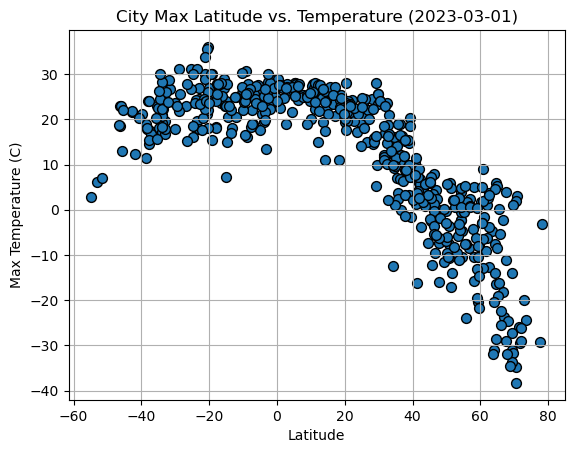

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter("Lat","Max Temp", s= 50, edgecolors= "black")

#convert Unix Epoch to Datetime
date = city_data_df.iloc[1,8]
convertingDate = datetime.fromtimestamp(date)
convertingDateToStr = convertingDate.strftime("%Y-%m-%d") 

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({convertingDateToStr})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

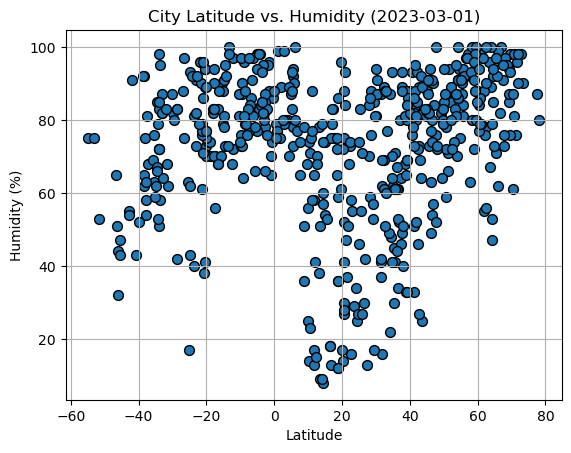

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter("Lat","Humidity", s= 50, edgecolors= "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({convertingDateToStr})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

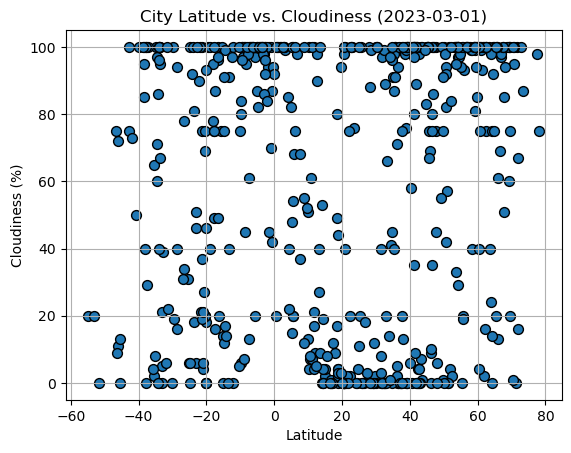

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter("Lat","Cloudiness", s= 50, edgecolors= "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({convertingDateToStr})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

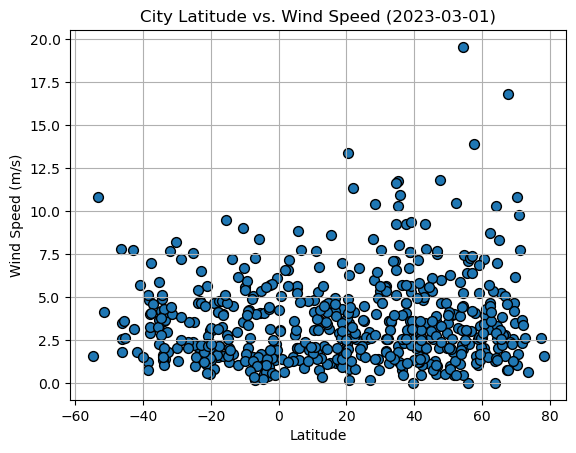

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter("Lat","Wind Speed", s= 50, edgecolors= "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({convertingDateToStr})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df.iloc[:,1] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,borgarnes,64.5383,-21.9206,6.03,92,100,2.58,IS,1677722490
4,meulaboh,4.1363,96.1285,26.36,80,85,1.49,ID,1677722491
5,bucerias,20.7500,-105.3333,20.50,84,100,0.80,MX,1677722492
6,barrow,71.2906,-156.7887,-25.99,76,0,7.72,US,1677722492
9,yellowknife,62.4560,-114.3525,-12.71,78,75,8.75,CA,1677722419


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df.iloc[:,1] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,18.60,32,11,3.48,NZ,1677722489
2,ulladulla,-35.3500,150.4667,22.97,63,65,3.67,AU,1677722490
3,east london,-33.0153,27.9116,19.73,82,5,1.81,ZA,1677722491
7,kavieng,-2.5744,150.7967,28.28,78,100,5.69,PG,1677722493
8,new norfolk,-42.7826,147.0587,21.72,55,100,3.13,AU,1677722493


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7756094214990711


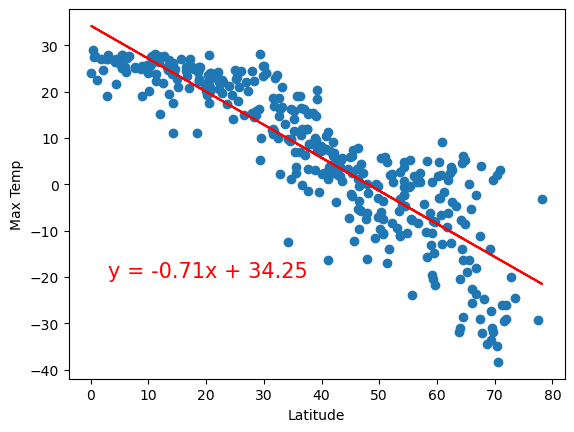

In [15]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(3,-20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.16442730116850532


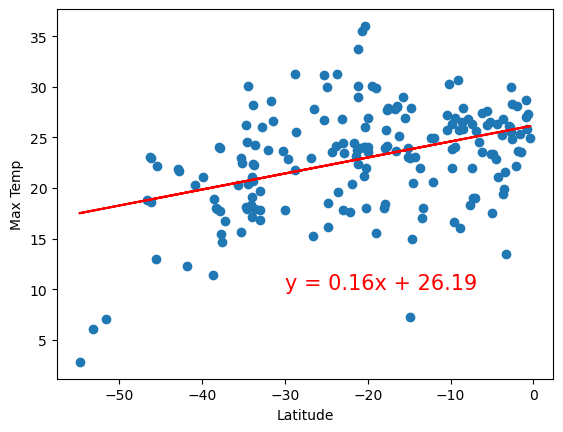

In [16]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.16751228642385338


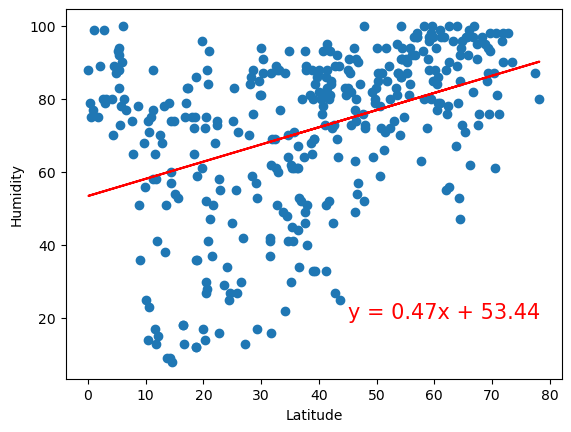

In [17]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.19849119554009398


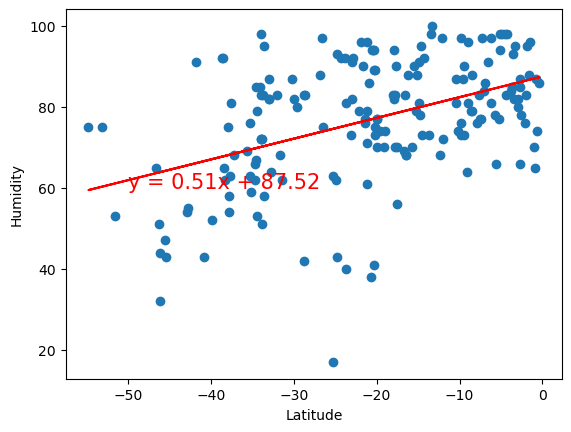

In [18]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.08981846884861024


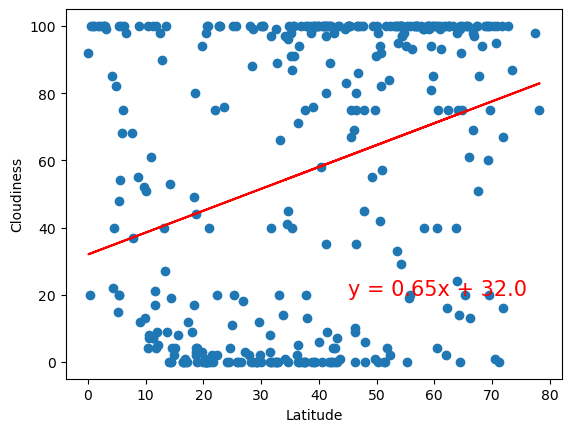

In [19]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0989460383942207


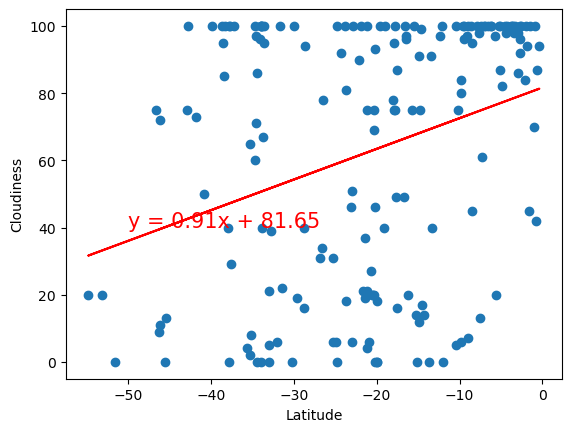

In [20]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0017574957892091865


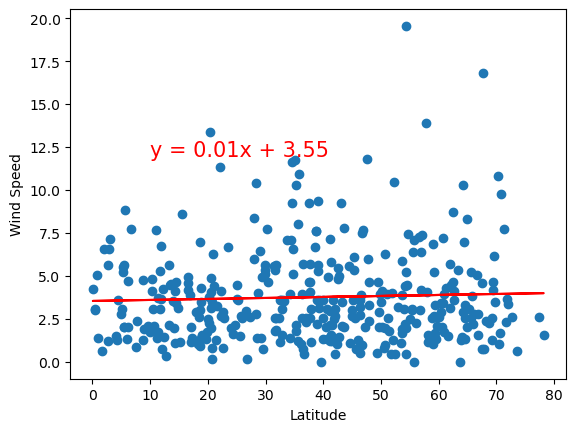

In [21]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.027273595405742247


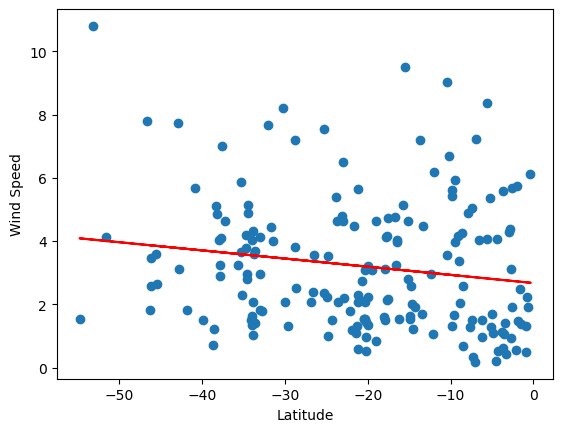

In [22]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-30,12),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE